# Deck 8: Data visualization as advocacy

# Activity

- **Rational**: The drawing is an architectural drawing/floor map to scale and doesn't exaggerate the size of the people nor the ship, Thus allowing readers to draw rational, objective conclusions on the conditions in the ship. 
- **Moral**: Readers will be struck by violation of human dignity and effectively treating people as slaves and, from this image, human cargo.
- **Emotional**: The initial emotional impact for me comes from the claustrophobic conditions and uniformity in the individuals' positions. This image forces readers to imagine how these individuals were in these tight spaces for long periods of time, right next to each other and underneath the deck of the boat. The image also has underlined keywords, like several slaves being stowed _under_ the shelves - emphasizing the emotional, claustrophobic, and uncomfortable conditions of these individuals.

# Deck 9: Beyond `matplotlib`

### Seaborn

In [2]:
# Load libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests

# Load sample dataset from seaborn
tips = sns.load_dataset("tips")
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


<Axes: xlabel='total_bill', ylabel='tip'>

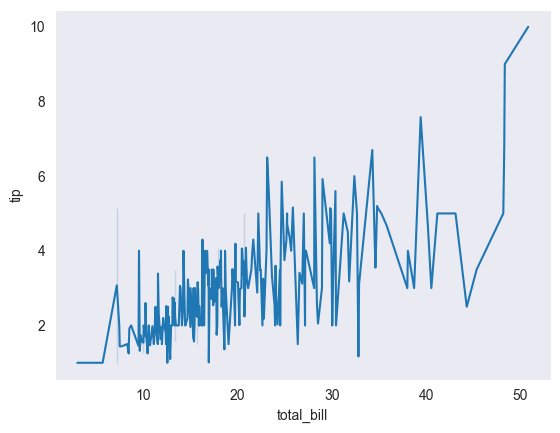

In [3]:
sns.set_style('dark') # premade style
sns.lineplot(data=tips,       # choose our dataset
           x='total_bill',  # define our x variable
           y='tip')         # define our y variable

[Text(0.5, 1.0, 'Tips vs. Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

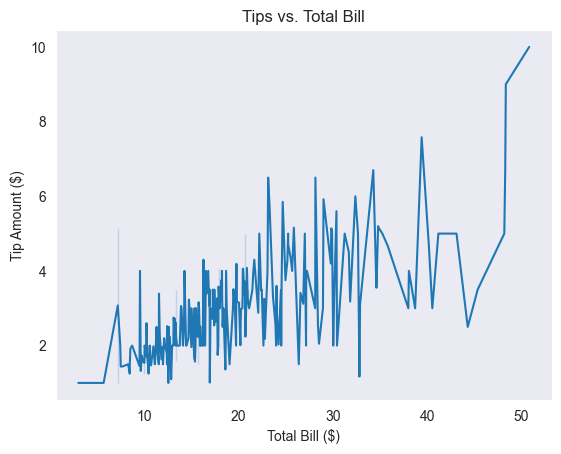

In [4]:
# add title and axis labels
tipgraph = sns.lineplot(data=tips,
                        x='total_bill',
y='tip')
tipgraph.set(title='Tips vs. Total Bill',
            xlabel='Total Bill ($)',
            ylabel='Tip Amount ($)')

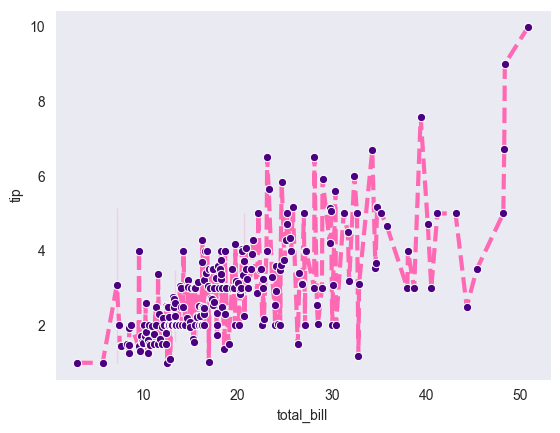

In [5]:
#modify aesthetic elements
tipgraph = sns.lineplot(data=tips,
                      x='total_bill',
                      y='tip',
                      color = 'hotpink',
                      linestyle = '--',
                      linewidth = 3,
                      marker = 'o',
                      markerfacecolor = 'indigo')

[Text(0.5, 1.0, 'Tips vs. Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

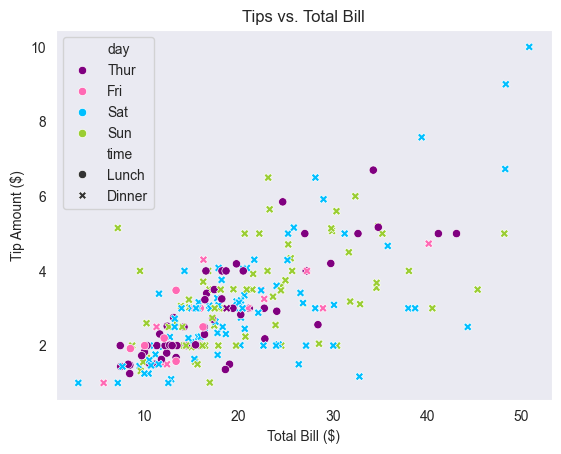

In [6]:
# Why is seaborn an improvement? E.g., it can represent multiple variables easily
tipgraph = sns.scatterplot(data=tips, x='total_bill',
                        y="tip", style = "time", hue =
                        "day", palette = ["purple",
                        "hotpink", "deepskyblue",
                        "yellowgreen"])
tipgraph.set(title='Tips vs. Total Bill',
            xlabel='Total Bill ($)',
            ylabel='Tip Amount ($)')

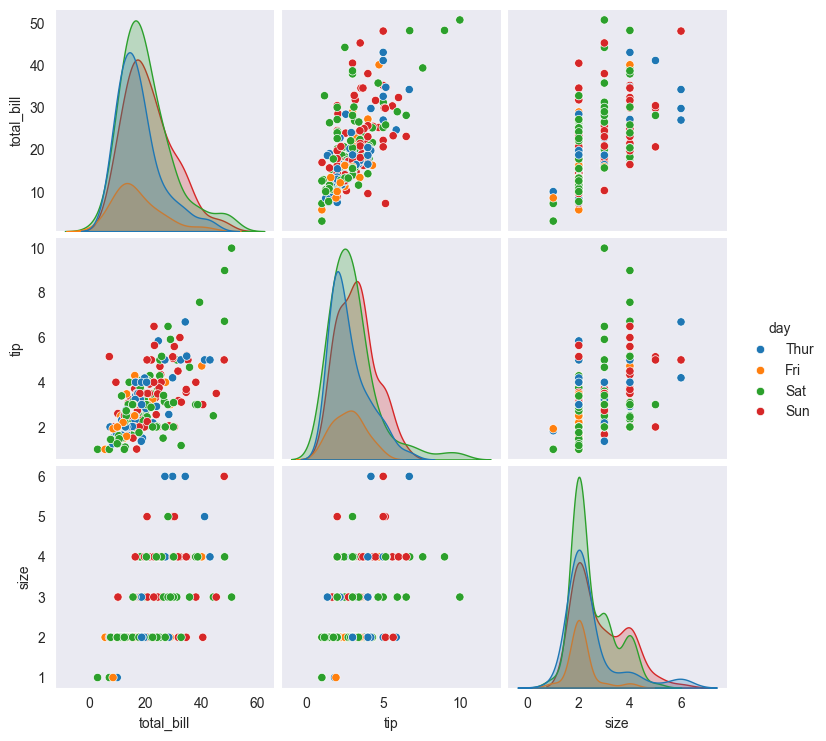

In [7]:
# We can also do a pairplot to compare variables:

sns.pairplot(
      data = tips,
hue = 'day')

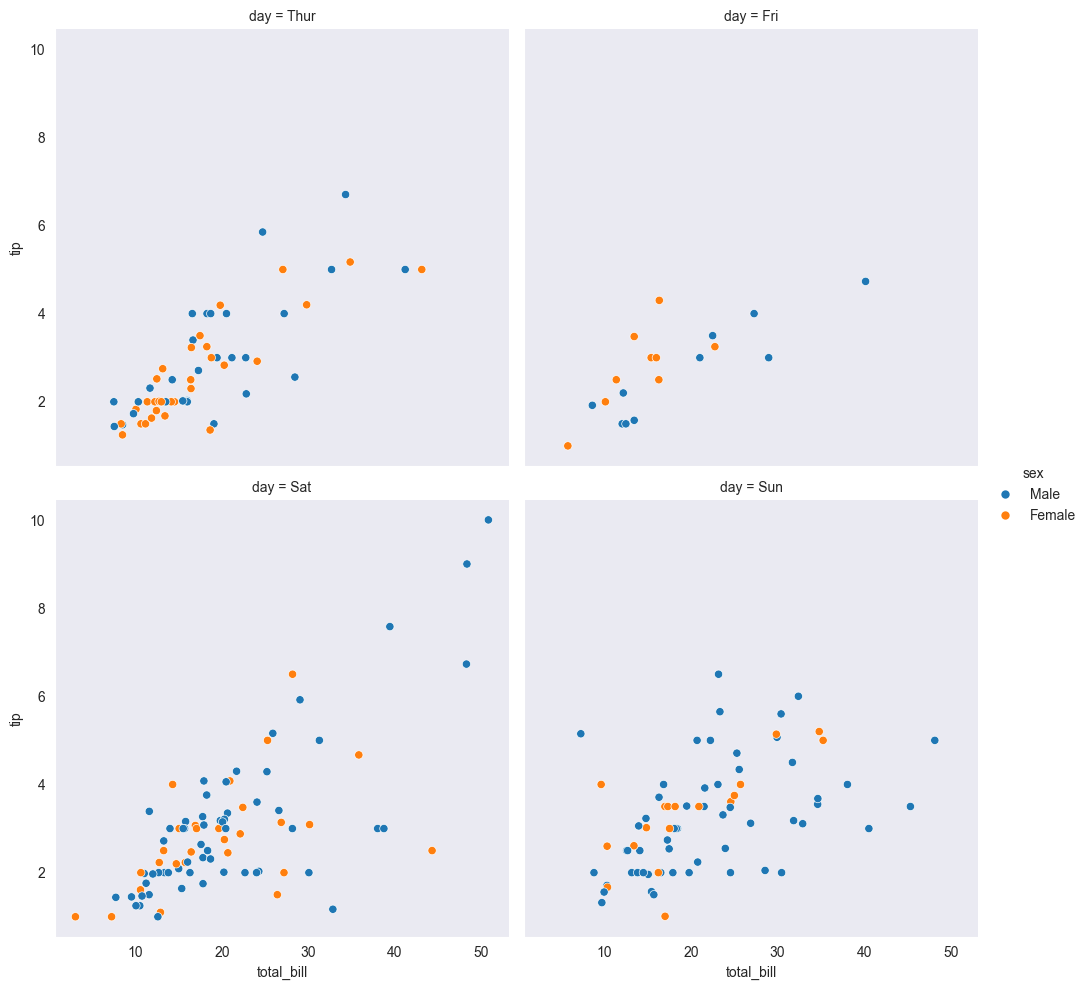

In [8]:
# Activity: Comment this snippet of relplot code and describe what each one is doing

daysplot = sns.relplot(
            data=tips, # defining DV/values
            x="total_bill", # defining IV/x-axis
            y="tip", # putting DV on y-axis
            hue="sex", # colouring points by sex, as seen on legend
            col="day", # breaking the plot out into facets by day
            kind="scatter", # defining the plot type as a scatter plot
            col_wrap=2) # forcing the plots into two columns

### Activity: Comparing data visualizations

- Fundamentally, these two plots display different sets of data. The bar plot shows mean ratings for instructors in a facet plot-style (with the vertical middle line) to separate the actual vs perceived gender IV. It also contains error bars and sample sizes per group plotted. The gendered language plot on the other hand plots gendered language use by gender across disciplines, and it provides the range of responses rather than mean values. It also has visual markers for density (e.g., end points are larger). 
- **Plot 1 (bar plot), pros:** Simple, clean outcomes with explicit mean values, error bars, and sample sizes for each group. I think the vertical middle line helps separate the actual/perceived IV. The shading also allows for easy readability and accessibility. **Cons:** Depending on the context this is published in, it may not have merited a plot for four values (which can typically be reported in-text in many cases). I would prefer the grid lines to be lighter and not be the same colour as the male bars.
- **Plot 2, pros:** Chronologically sorted by highest uses to lowest uses by subject. The use of colour is generally good for the endpoint markers (orange and blue). **Cons:** The colours between the endpoints aren't clear nor defined as to what they actually mean. The legend overlaps with the top data points. The "Fine Arts" values on the bottom are on the x-axis itself, which is very odd aesthetically. The y-axis is not labelled, making it difficult to understand if the title 'professor' is supposed to be on the y-axis, i.e., about professors from that subject, or a specific one (without the extra information on the left side).
 

### Activity: Types of changes
- The x-axis scale and axis order (on the y-axis) change if I try to adjust the data in any way, which can make it tricky to compare snapshots of data as I filter things out or focus on specific points of interest. The colours and subjects stay constant, making those elements easier to compare.
- I would not change the y-axis ordering, or at least have an option to keep it constant. It would be very beneficial to compare these changes based on the baseline case of uses per million words, or at least against other snapshots that might be of interest. I would also have an option to keep the x-axis scale the same to highlight, e.g., how much positive and negative comments make up all ratings. I wouldn't however change the option to hover over each point to look at them more closely, I think this is a great detail.

### Plotly

In [24]:
# Import and make sample data
import plotly.graph_objects as go     # 'go' is 'graph objects’

x1 = np.array(["Luffy", "Zoro", "Nami", "Usopp", "Sanji"])
y1 = np.array([110, 180, 240, 99, 220])


# Make figure
graph = go.Figure()

# Choose plot type (bar) and our data
graph.add_trace(go.Bar(x=x1, y=y1))

# Update layout to include titles
graph.update_layout(
    title="Pirate Scores",
    xaxis_title="Pirates",
    yaxis_title="Score")

# Show plot
graph.show(renderer="browser") # doesn't work within python here

# Save it
graph.write_html("pirategraph.html")

In [25]:
graph = go.Figure()
graph.add_trace(go.Scatter(x=x1, y=y1, mode='markers',    # we want points for a scatter plot
    marker=dict(
        size=15,
)))
graph.update_layout(
    title='Interactive Pirate Plot',
    xaxis_title='Pirates',
    yaxis_title='Scores',
    width=500, height=500)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'size': 15},
              'mode': 'markers',
              'type': 'scatter',
              'x': array(['Luffy', 'Zoro', 'Nami', 'Usopp', 'Sanji'], dtype=object),
              'y': {'bdata': 'bgC0APAAYwDcAA==', 'dtype': 'i2'}}],
    'layout': {'height': 500,
               'template': '...',
               'title': {'text': 'Interactive Pirate Plot'},
               'width': 500,
               'xaxis': {'title': {'text': 'Pirates'}},
               'yaxis': {'title': {'text': 'Scores'}}}
})

In [ ]:
# Word cloud: First import the package
from wordcloud import WordCloud
df = pd.read_csv("https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/movie_quotes.csv",
on_bad_lines='skip')
df

,quote,movie,type,year
0,"Do, or do not. There is no try.",Star Wars: Episode V - The Empire Strikes Back,movie,1890
1,Listen to them. Children of the night. What mu...,Dracula,movie,1931
2,It's alive! It's alive!,Frankenstein,movie,1931
3,"Oh, no, it wasn't the airplanes. It was Beauty...",King Kong,movie,1933
4,"Magic Mirror on the wall, who is the fairest o...",Snow White and the Seven Dwarves,movie,1937
...,...,...,...,...
727,I didn't know if you were lost. Stick with me....,Us,movie,2019
728,This guy's awesome! He's holding his own while...,Dragon Ball Super: Broly,movie,2019
729,"Murder is murder, it don’t matter who you are.",Black and Blue,movie,2019
730,You know what a lion is? A lion is a strong an...,Between Two Ferns: The Movie,movie,2019


(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

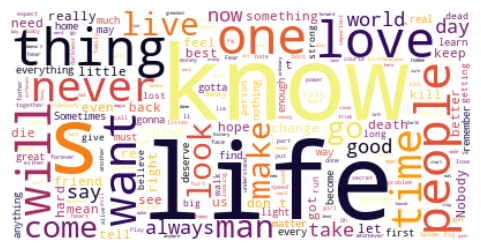

In [ ]:
# Make the wordcloud:
# 
# # join all our text from each row from our quote column into a string
text = " ".join(each for each in df.quote)
# generate our wordcloud image
wordcloud = WordCloud(background_color="white",
colormap = 'inferno').generate(text)
# use matplotlib syntax to put our image in a figure
fig, ax = plt.subplots(figsize=(7, 3))
ax.imshow(wordcloud,                  # remember 'imshow' from when we added pictures to our matplotlib axes
        interpolation='bilinear')   # this line helps smooth our image
ax.axis("off")

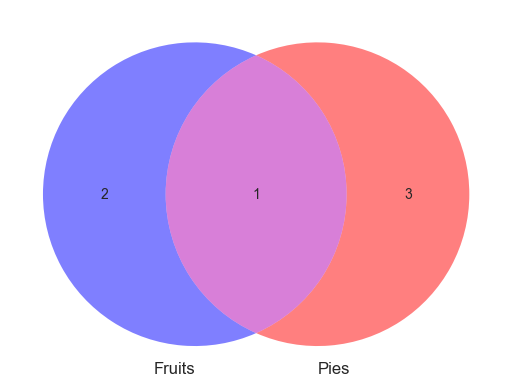

In [32]:
# Making Venn diagrams
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted

# Define sets
A = set(["apple", "banana", "watermelon"])
B = set(["pumpkin", "blueberry", "apple", "key lime"])

# Assign sets to each circle and modify appearance
diagram = venn2_unweighted([A, B],
                            set_labels = ('Fruits', 'Pies'),
                            set_colors=("blue", "red"),
                            alpha=0.5)

plt.show()